In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer")
fb5=pd.read_csv('nysu_10902_2019立委_research_補3.csv')
fb6=pd.read_csv('nysu_10902_2019立委_research_補4.csv')
fbc=pd.merge(fb5,fb6,how="outer")
fb7=pd.read_csv('nysu_10902_2019立委_research_補5.csv')

In [2]:
fbA=pd.merge(fba,fbb,how="outer")
fbB=pd.merge(fbc,fb7,how="outer")

In [3]:
fb=pd.merge(fbA,fbB,how="outer")
pd.set_option('display.max_colwidth', None)#setting the maximize string show
politics = pd.read_csv('9th_legislator_promise.csv')

In [4]:
import numpy as np
from collections import Counter

fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

以台北市第四選區立委李彥秀為例，依照月份來統計數值資料的變化

In [5]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,"鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管機關，可是此案送進環評大會後，卻投票翻案通過，環保署前副署長詹順貴辭職明志、更在聲明上直言：「既有環評制度的社會信任基礎受到嚴重傷害」。桃園市長鄭文燦選前選後不同臉,更被環團公認「背信忘義」。\n選後中油火速動工三接 ，學聖感於《環評法》改革的聲音未曾中斷，藻礁因三接被開腸破肚案更凸顯許多環評制度現有的缺失和重要性， 今日學聖與潘忠政老師、環境法律人協會張譽尹理事長 、台灣蠻野足心生態協會蔡雅瀅律師、國立台灣大學風險社會與政策研究中心林木興助理研究員、財團法人環境權保障基金會郭鴻儀律師等一同討論《環評法》修正草案，學聖也承諾將於新會期開始送出修法草案。",NaN,photo,https://www.facebook.com/244784245612709/posts/2052039854887130/,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [6]:
#政見 有哪些立委
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [7]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘', '莊瑞雄', '楊曜Yangyao', '郭國文', '洪宗熠-熠起更好', '陳歐珀', '林俊憲', '蔣萬安',
       '立法委員 馬文君', '鍾佳濱', '費鴻泰（阿力克司）', '何志偉', '余天 Yu Tian', '陳素月SayYes',
       '陳超明-阿明哥粉絲團', '登真-邱議瑩'], dtype=object)

In [8]:
lee = fb[fb.page_name == "李彥秀"]
# 把時間格式轉換
lee['new_date'] = pd.to_datetime(lee['created_time_taipei']).dt.date
lee['post_hour'] = pd.to_datetime(lee['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
lee['month_year'] = pd.to_datetime(lee['new_date']).dt.to_period('M')
lee.head(1)

<ipython-input-8-5c0199f549d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lee['new_date'] = pd.to_datetime(lee['created_time_taipei']).dt.date
<ipython-input-8-5c0199f549d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lee['post_hour'] = pd.to_datetime(lee['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-8-5c0199f549d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
20402,606321216096498_2117673888294549,606321216096498,李彥秀,政治人物,#家暴不是家務事 \n\n這幾天一個家暴個案的新聞連續幾天佔據媒體版面，不但令人傷心也令人憤怒。\n\n但是在滿滿的負面情緒之餘，我們更應該思考，家暴防治法民國87年通過，實施了20年，仍舊有加害人把家庭暴力當成家務事；家暴防治專線113宣導多時，連續性的家暴案件還是時有所聞。\n\n是宣導仍舊不夠嗎？\n是社工量能不足嗎？\n是後續介入輔導的工作應該更加仔細嗎？\n是我們的社會沒有給予被害人足夠的支持，讓他們勇敢走出受暴的場域嗎？\n是我們的法治沒有足夠的懲戒力，要求施暴者接受必需的處罰、輔導或是治療嗎？\n還是有其他應該關注我們卻忽略的面向英國去加強補足的？\n\n不論是那個面向的思考，似乎都有調整改進的空間，#家暴零容忍 不應只是說說，需要大家一起關注；需要政府更多的重視。\n\n#民代的喃喃自語,NaN,photo,https://www.facebook.com/606321216096498/posts/2117673888294549/,2019-01-15T09:10:24+0000,2019-01-15T17:10:24,...,0,0,0,0,0,20,9,2019-01-15,17,2019-01


In [9]:
#發文時間分佈
post_time = lee[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,2
1,5,1
2,7,8
3,8,12
4,9,53
5,10,64
6,11,49
7,12,30
8,13,22
9,14,31


In [12]:
lee[lee.created_time_taipei == max(lee.created_time_taipei)]
#找出時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
38035,606321216096498_2762786843783247,606321216096498,李彥秀,Politician,法定選舉宣傳的時間即將結束！\n\n一路走來，感謝我的團隊、我的志工、內湖南港的里長、鄰長。感謝每一個幫忙的黨內先進、議會夥伴。更要感謝有所有的支持、建議、以及批評！\n\n我經常說，每一次選舉都是四年努力的驗收，都是決定自己是否能夠繼續走下去的期末考！過去四年來，是國民黨在國會席次最少的一屆，我跟我的立法院夥伴們每個人都是一個人當三個用。我更是貪心的人，問政質詢、帶領黨團、地方行程、選民服務沒有一樣可以漏掉！過去擔任議員期間，幾乎每一個行程我都自我要求要親自到場。所以在立法院四年，我有要做很多痛苦取捨，很多奔波！所以，我更要謝謝內湖、南港的鄉親，體諒我調整行程，讓我可以多點時間在國會，多點時間在電視上辯護......卻少了跟您們面對面親自溝通、話家常的時間！\n\n但我心裡很清楚，即便再多努力，選舉從來都不是輕鬆的事情！民意代表更要與時俱進，跟著選民一起成長。所以，我們調整了選舉的節奏，改變了與您溝通的方式，增加了更多管道與模式，就是希望可以更貼近您的需求與想法！希望可以跟您有更多互動，爭取更多的認同。\n\n一路走來，我們承載了好多好多的祝福，還有好多好多的期許，每一個正面的力量，都是支持我跟我的團隊繼續走下去的原動力！\n\n我要再一次拜託大家，明天我們一起去投票，用您的選票支持我！讓我可以繼續拚！用選票給我力量！讓我可以繼續為這片美好的土地努力！\n\n因為，李彥秀從來都不是一個人，因為有您們，才是完整的李彥秀！\n\n#二話不說挺彥秀\n#2020選2就贏\n#催票拉票投票\n#守護好立委就差您一票\n#謝謝所有的里長\n#謝謝所有的志工\n#謝謝我的團隊\n#謝謝所有的支持鼓勵\n#正能量 #笨方法 #腳踏實地打選戰,NaN,photo,https://www.facebook.com/606321216096498/posts/2762786843783247/,2020-01-10T13:40:42+0000,2020-01-10T21:40:42,...,0,0,0,0,0,122,11,2020-01-10,21,2020-01


In [13]:
lee[lee.created_time_taipei == min(lee.created_time_taipei)]
#找出時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
20414,606321216096498_2099896366738968,606321216096498,李彥秀,政治人物,目前為了查核新生有沒有依規定時程接種疫苗，幼兒園教保員、國小教師需要花費許多心力要求家長提供預防接種紀錄卡，並進一步去檢視小朋友疫苗施打的狀況。如此耗費人力的作法，不僅浪費了教育人員的時間，更壓縮了教學準備的量能。\n\n因此，今天我與全國教育產業總工會，一同在立法院召開記者會。我具體要求：\n\n疫苗接種的檢核，涉及行政機關、教育人員、學生家長與醫療院所。目前醫療院所（及衛生所）在為兒童施打疫苗後，其實已會將接種紀錄登錄至行政機關的「全國性預防接種資訊管理系統」中。故在確保個資及資訊安全的前提下，行政機關應該利用既有資訊軟體系統的整合或數據分析，於兼顧教育人員與醫事人員權益的同時，由地方衛生局統籌自系統內篩選過濾有異常施打狀況的學童，主動交由教育局提供予學校端，以減少不必要的人力查對流程，讓教育人員能夠把珍貴的精力花在教學，而不是無謂的紙本工作。\n\n#資訊整合 #數位時代\n#有限的時間應該花在刀口上,NaN,photo,https://www.facebook.com/606321216096498/posts/2099896366738968/,2019-01-03T04:00:59+0000,2019-01-03T12:00:59,...,0,0,0,0,0,7,3,2019-01-03,12,2019-01


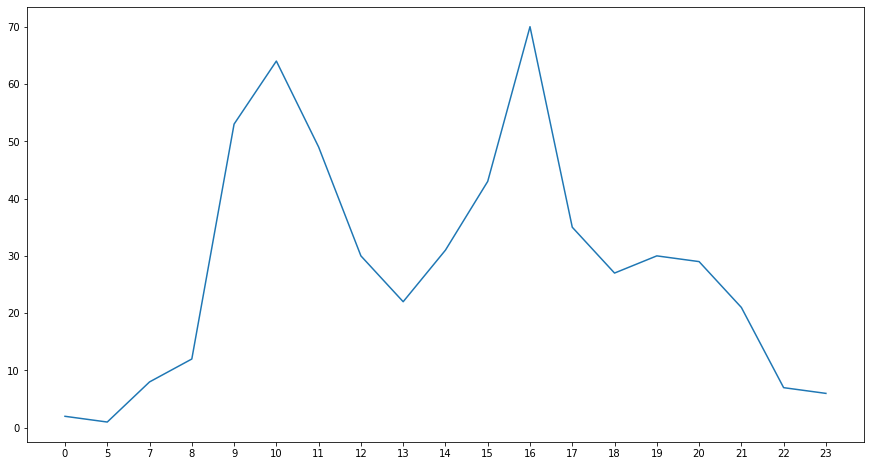

In [14]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [15]:
#整年貼文數量分佈
whole_year = lee[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,30
1,2019-02,43
2,2019-03,37
3,2019-04,37
4,2019-05,38
5,2019-06,33
6,2019-07,38
7,2019-08,43
8,2019-09,40
9,2019-10,60


In [16]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,13.000000
mean,41.538462
std,8.931362
min,30.000000
25%,37.000000
50%,38.000000
75%,43.000000
max,60.000000


In [17]:
results = lee.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,18189636482894940,12287,0,0,0,0,0,578,351,416
2019-02,26071812292149392,16679,0,0,0,0,0,1294,591,558
2019-03,22433884995570416,23519,0,0,0,0,0,2079,1097,526
2019-04,22433884995570416,27130,0,0,0,0,0,1826,570,539
2019-05,23040206211666912,48464,0,0,0,0,0,4173,871,556
2019-06,20008600131184432,60621,0,0,0,0,0,2896,1069,482
2019-07,23040206211666912,39525,0,0,0,0,0,2322,998,554
2019-08,26071812292149392,77531,0,0,0,0,0,2940,1682,632
2019-09,24252848643859904,73674,0,0,0,0,0,2603,994,576


In [18]:
results.index.name = 'newhead' #將上行定義出的results索引標籤命名為newhead
results.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列，個人覺得意義不大
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,18189636482894940,12287,0,0,0,0,0,578,351,416
1,2019-02,26071812292149392,16679,0,0,0,0,0,1294,591,558
2,2019-03,22433884995570416,23519,0,0,0,0,0,2079,1097,526
3,2019-04,22433884995570416,27130,0,0,0,0,0,1826,570,539
4,2019-05,23040206211666912,48464,0,0,0,0,0,4173,871,556
5,2019-06,20008600131184432,60621,0,0,0,0,0,2896,1069,482
6,2019-07,23040206211666912,39525,0,0,0,0,0,2322,998,554
7,2019-08,26071812292149392,77531,0,0,0,0,0,2940,1682,632
8,2019-09,24252848643859904,73674,0,0,0,0,0,2603,994,576
9,2019-10,36379272965789824,140541,0,0,0,0,0,4918,2105,811


In [19]:
results['newhead'].map(str)#將索引標籤newhead那欄中所有資料轉為字串格式

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

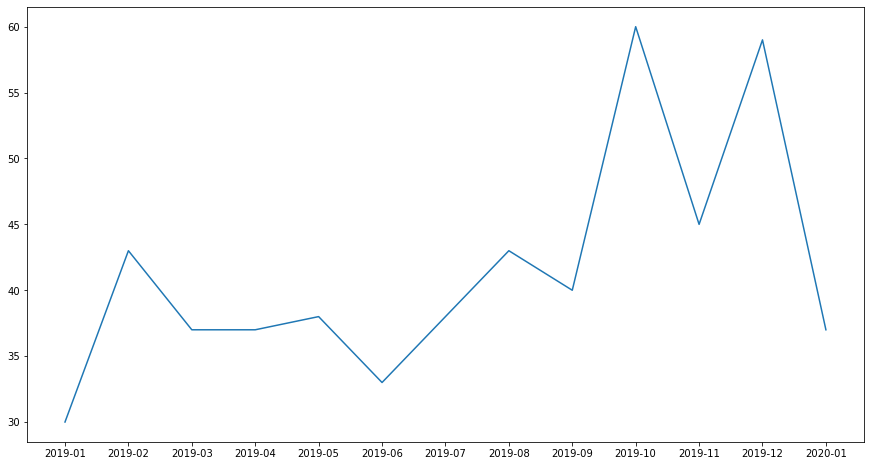

In [20]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [21]:
# 每個月的按讚、評論、分享總數 分佈
results = lee.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,18189636482894940,12287,0,0,0,0,0,578,351,416
1,2019-02,26071812292149392,16679,0,0,0,0,0,1294,591,558
2,2019-03,22433884995570416,23519,0,0,0,0,0,2079,1097,526
3,2019-04,22433884995570416,27130,0,0,0,0,0,1826,570,539
4,2019-05,23040206211666912,48464,0,0,0,0,0,4173,871,556
5,2019-06,20008600131184432,60621,0,0,0,0,0,2896,1069,482
6,2019-07,23040206211666912,39525,0,0,0,0,0,2322,998,554
7,2019-08,26071812292149392,77531,0,0,0,0,0,2940,1682,632
8,2019-09,24252848643859904,73674,0,0,0,0,0,2603,994,576
9,2019-10,36379272965789824,140541,0,0,0,0,0,4918,2105,811


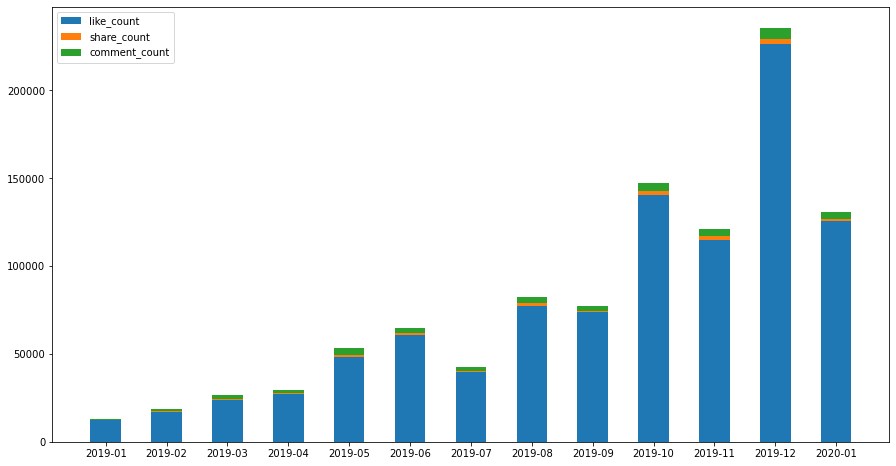

In [22]:
#整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [23]:
# 很明顯10月按讚、分享、評論數很高，因此找出10月的資料
lowest = lee[lee.month_year == "2019-10"]
results_low = lowest.groupby('new_date').sum()
results_low.index.name = 'newhead' #更改欄位名稱
results_low.reset_index(inplace=True)
results_low

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-10-01,1212642432192996,7921,0,0,0,0,0,201,96,29
1,2019-10-02,1818963648289494,5034,0,0,0,0,0,152,70,45
2,2019-10-03,1212642432192996,7028,0,0,0,0,0,128,72,29
3,2019-10-04,1212642432192996,1450,0,0,0,0,0,60,44,27
4,2019-10-05,2425284864385992,6867,0,0,0,0,0,116,52,70
5,2019-10-06,1818963648289494,4173,0,0,0,0,0,108,52,42
6,2019-10-07,1212642432192996,4512,0,0,0,0,0,161,49,29
7,2019-10-08,606321216096498,2205,0,0,0,0,0,105,51,9
8,2019-10-09,1818963648289494,7337,0,0,0,0,0,182,96,37
9,2019-10-10,1212642432192996,6386,0,0,0,0,0,187,68,26


In [24]:
# 找出6月的資料
higher = lee[lee.month_year == "2019-06"]
results_high = higher.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-06-01,1212642432192996,15589,0,0,0,0,0,712,160,29
1,2019-06-02,606321216096498,3274,0,0,0,0,0,90,25,18
2,2019-06-04,606321216096498,1738,0,0,0,0,0,63,26,15
3,2019-06-05,606321216096498,1514,0,0,0,0,0,194,163,16
4,2019-06-07,606321216096498,4792,0,0,0,0,0,220,33,8
5,2019-06-08,606321216096498,390,0,0,0,0,0,23,10,16
6,2019-06-10,1212642432192996,1792,0,0,0,0,0,66,28,24
7,2019-06-11,606321216096498,358,0,0,0,0,0,28,9,10
8,2019-06-13,606321216096498,617,0,0,0,0,0,20,10,10
9,2019-06-14,606321216096498,2287,0,0,0,0,0,69,20,11


No handles with labels found to put in legend.


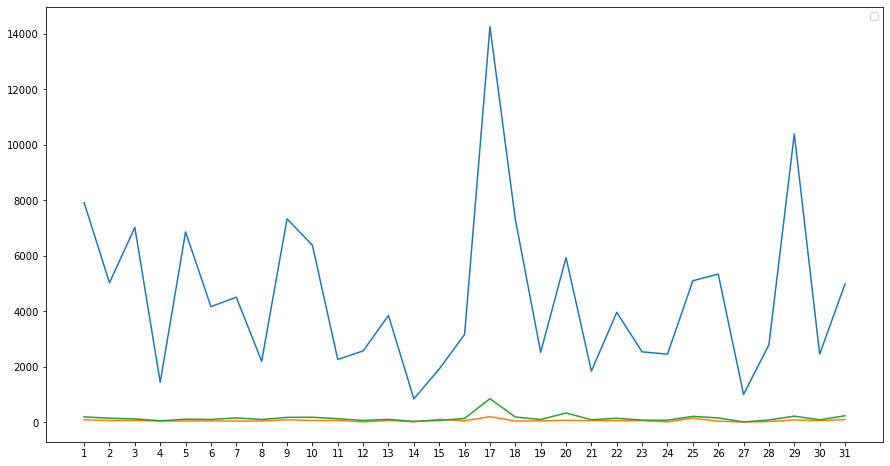

In [25]:
#畫圖 看整個月按讚、分享、評論的流量
labels = [str(i) for i in range(1,32)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_low['like_count'])
ax.plot(labels, results_low['share_count'])
ax.plot(labels, results_low['comment_count'])

ax.legend()

plt.show()

No handles with labels found to put in legend.


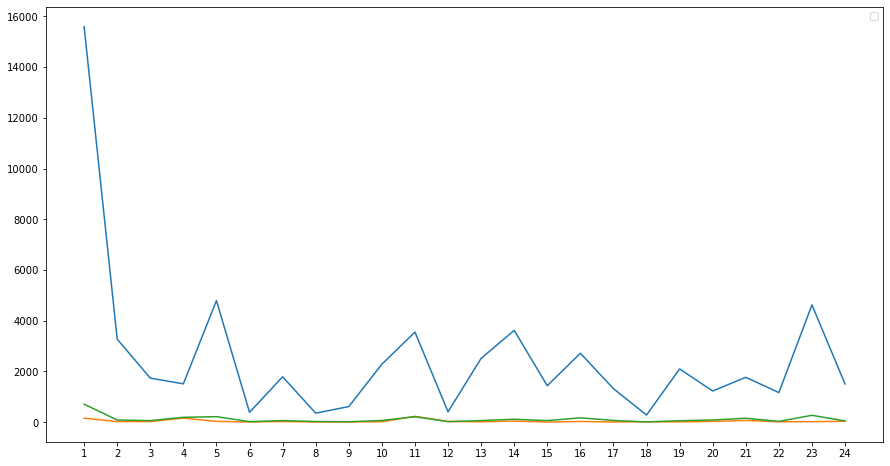

In [26]:
#畫圖 看整個月按讚、分享、評論的流量
labels = [str(i) for i in range(1,25)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [27]:
#10/17 號很明顯按讚最高  因此找出這天的文章
lee['new_date']=lee['new_date'].map(str) # turn 'new_date' into str
Oct_17 = lee[lee['new_date'] == "2019-10-17"]
Oct_17[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-27-37a15553231a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lee['new_date']=lee['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
20787,你有看過候選人自己拿舉牌嗎？ 如果沒有，現在讓你看看！ #路邊聊了起來,784,11671
20788,今年十月真是秋高氣爽，正好適合出遊，今年要去哪裡玩呢？ #早晚溫差跟飄雨還是要留意唷,71,2592


In [28]:
#6/1 號很明顯按讚最高  因此找出這天的文章
lee['new_date']=lee['new_date'].map(str) # turn 'new_date' into str
Jun_01 = lee[lee['new_date'] == "2019-06-01"]
Jun_01[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-28-716590e63238>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lee['new_date']=lee['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
20595,#一起贏回中華民國 團結一致，讓國民黨重返執政，再現藍天。,299,4771
20596,昨天院會忙碌的空檔，立法院來了一位過去老朋友，更是未來的戰友，我的好朋友李永萍副市長。 永萍已經順利獲得國民黨提名，將代表國民黨挑戰新北七星區的立委。汐止與港湖一線之隔，在空汙防制、交通道路動線、民生汐止線規劃......等議題上，都是有共同的立場以及需要合作、溝通、協調的空間。 希望我們一起努力，可以在下一屆的立法院一起並肩作戰，一起為港湖汐止七星區創造更好的生活環境。 #李永萍 #文創姊 #港湖汐止七星好朋友,413,10818


In [29]:
#找出按讚數量的統計值
lee['like_count'].describe()

count      540.000000
mean      1827.359259
std       2055.752840
min        105.000000
25%        514.000000
50%       1229.500000
75%       2476.000000
max      24822.000000
Name: like_count, dtype: float64

In [30]:
#找出評論數量的統計值

lee['comment_count'].describe()


count    540.000000
mean      74.644444
std       85.542813
min        1.000000
25%       27.000000
50%       50.500000
75%       86.250000
max      787.000000
Name: comment_count, dtype: float64

In [31]:
# 比較、查看他政見
promise = politics[politics.姓名 == "李彥秀"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['4    \u3000用心陪你走 大手牽小手 1.強化公托、臨托制度',
 '2.\x07編制儲備教師，成立安親系統，活化校園閒置 空間',
 '3.推動分齡性向輔導機制，擺脫制式教育',
 '4.督促建置輔導人力預防校園霸凌',
 '5.重視食安管理，對黑心業者罰得到、快、重',
 '6.\x07推動「5安幸福在台灣｣照顧新住民',
 '\u3000\u3000\u3000\u3000用心啟動未來，打破低薪魔咒 1.\x07健全十二年國教制度，技職教育科系專業化、 實習生納入勞基法保障',
 '2.改善新鮮人求職環境，增設免費職訓課程',
 '3.調降租屋補助門檻、增設青年出租公營住宅',
 '4.興建青年住宅並設托育中心',
 '5.推動微型創業，建立創業導師制',
 '\u3000\u3000\u3000\u3000用心訂製幸福',
 '長期照護、單親扶助 1.確保長期照護保險法通過，建立穩定財源',
 '2.建立長期照護銀行，提供社區照護服務',
 '3.中低收入戶審查精緻化避免一刀式區分',
 '4.推動年金改革',
 '5.建立急難扶助據點',
 '6.協助單親家庭養育、教育困境',
 '\u3000\u3000\u3000\u3000用心呵護 看見港湖新未來 1.加速老舊工業住宅都更，推動都市再造',
 '2.兵工廠、聯勤司令部遷移，拓展南港腹地',
 '3.加速電纜、電塔地下化',
 '4.規劃內湖焚化廠改建為青年住宅',
 '5.結合民間資源保存古蹟',
 '\u3000\u3000\u3000\u3000用心成就港湖，園區回饋鄰里 1.\x07推動內湖科技園區、南港軟體園區提撥補助金 回饋地方',
 '2.\x07尋求策略型產業，提升國際競爭力，強調企業 社會責任',
 '3.\x07勞資團體協商制度化，保障勞工權益',
 '\u3000\u3000\u3000\u3000\x07用心打造 南港東區新門戶，內湖科技智 慧城 1.力拚民生汐止線106年動工',
 '2.捷運南北線重新啟動',
 '3.興建信義線東延至研究院路二段',
 '4.加速高鐵南港站通車，台鐵南港站升級',
 '5.通盤檢討松山機場存廢。']

In [32]:
#按讚次數最多的貼文 
toplike_10 = lee.sort_values(by = ['like_count'],ascending = False).head(10)
toplike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
20661,就是佩服兩個字！ 柱姐敢於承擔的精神，敢於挑戰的勇氣是令人敬佩。 願意投入艱困選區，是勇敢的決定，柱姐加油！ #颱風天風雨生信心,24822,2019-08
38052,站穩每一腳步！ 握緊每一雙手！ 珍惜每一次懇託的機會！ 感謝每一份支持與鼓勵！ #一直都在 #用心專業 #二話不說挺彥秀,12841,2020-01
20787,你有看過候選人自己拿舉牌嗎？ 如果沒有，現在讓你看看！ #路邊聊了起來,11671,2019-10
20596,昨天院會忙碌的空檔，立法院來了一位過去老朋友，更是未來的戰友，我的好朋友李永萍副市長。 永萍已經順利獲得國民黨提名，將代表國民黨挑戰新北七星區的立委。汐止與港湖一線之隔，在空汙防制、交通道路動線、民生汐止線規劃......等議題上，都是有共同的立場以及需要合作、溝通、協調的空間。 希望我們一起努力，可以在下一屆的立法院一起並肩作戰，一起為港湖汐止七星區創造更好的生活環境。 #李永萍 #文創姊 #港湖汐止七星好朋友,10818,2019-06
20891,二號！李彥秀！ #好立委再連任 #選二號李彥秀 #抽完籤就立刻電話拜票的節奏,9518,2019-12
20705,新北出發，贏回中華民國！ 明天讓我們一起支持國民黨唯一提名總統候選人韓國瑜，壯大韓國瑜！贏回中華民國！ 地點：新北市幸福水漾公園 捷運：三重站1號出口 時間：9/8 14：00-21：00 #團結是我心中唯一的選項 #我的志工早就自發性動得很厲害,9302,2019-09
20866,在中研市場遇到可愛的越配姐妹！ #好厝邊 #二話不說挺彥秀 #中研市場,8390,2019-12
20862,頭髮亂了啦！ #忍不住唱了起來 #張學友,7990,2019-11
20812,長輩的支持總是格外的溫暖敦實！ 今天我在金瑞里辦理說明會，今年碰巧100歲的黃伯伯也特別到場表達支持，令人感動！ 黃伯伯身子骨硬朗、氣色紅潤，絲毫看不出年齡已經3位數，希望所有的長輩都能像黃伯伯一樣，活得健康、活得快樂！,7917,2019-10
20898,早安！ 星期一加油！ #對抗布魯曼迪,7740,2019-12


In [33]:
#許淑華的最少讚數前10的文章的 種類 video / photo?
toplike_10 = lee.sort_values(by = ['like_count'],ascending=False).head(10)
toplike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
photo,10,10,10,10,10,1,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
